<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Pandas: More on Missing Data (Imputation)
              
</p>
</div>

NTL-DS-051324
<p>Phase 1: Topic 5.2</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

Previously, the Mike Tyson approach:
<br>
<br>

<div align = "right">
<center><img src="Images/tyson.jpg" align = "center" width="500"/></center>
    <center>Ima .drop() you!!!</center>
</div>
    

Previously, the Mike Tyson approach:
<br>
<br>

<div align = "right">
<center><img src="Images/tyson.jpg" align = "center" width="500"/></center>
    <center>Then ima .eatyourchildren()!!!</center>
</div>
    

This lecture, the Lewis approach:
<br>
<br>
<div align = "right">
<center><img src="Images/lewis.png" align = "center" width="300"/></center>
    <center>The sweet science of imputation.</center>

#### Imputation

The science and art of filling in missing values in a dataset.
- May not want to throw away huge amounts of data.
    - Not a lot of data to begin with.
    - Can be very wasteful (e.g., throwing away all data on row because one attribute missing)

| Obs_ID  | L (m) | W (m) | L<sub>beak</sub> (cm) | W<sub>beak</sub> (cm) | m (kg) | n<sub>suckers</sub> | Bioluminescent? | Species|
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | 1.1 | .6 | 10 | 5 | 10 | | N | Ghost octopus |
| 1 | 30 | 9 | 8 | 5 | 180 | 1200 | N | Giant octopus |
| 2 | 1.5 | .8 |  |  | 12 |  | Y | S. Syrtensis |
| 2 | 1.3 | .9 | 3 | 2 | 12 | 150 |  | Glass Octopus |

<br>
<br>
Dropping either on row or column = no data.

#### Sequence data
- If data points likely correlated with points before and after:
    - e.g., Time Series
    
- May be reasonable to interpolate/fill.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
passengersvstime = pd.read_csv('data/AirPassengers.csv', parse_dates = True, index_col = 'Month', nrows = 60 )
passengersvstime.isna().sum()

#Passengers    9
dtype: int64

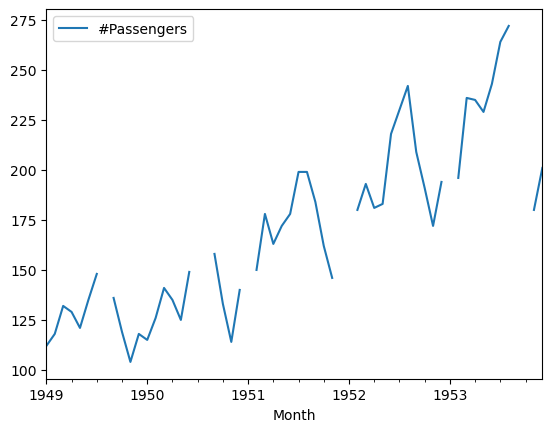

In [2]:
passengersvstime.plot();

The .fillna() method:

- Works on Series and Dataframes.

- Series.fillna(method = 'ffill'): forward fills
- Series.fillna(method = 'bfill'): backward fills

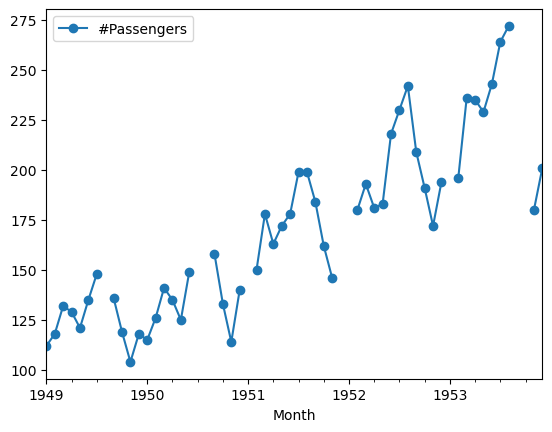

In [3]:
passengersvstime.plot(marker = 'o');

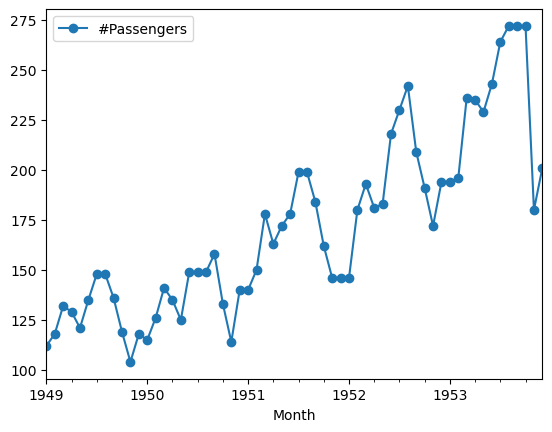

In [4]:
df = passengersvstime.fillna(method = 'ffill')
df.plot(marker = 'o');

.interpolate() method:
- many schemes for connecting point separated by NaNs
- how = 'linear': interpolates with line

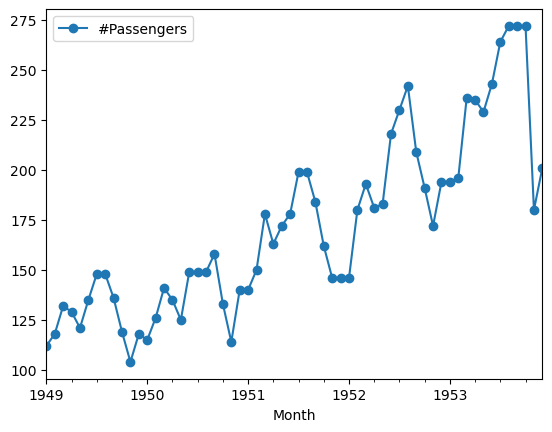

In [6]:
df = passengersvstime.fillna(method = 'ffill')
df.plot(marker = 'o')
plt.show()

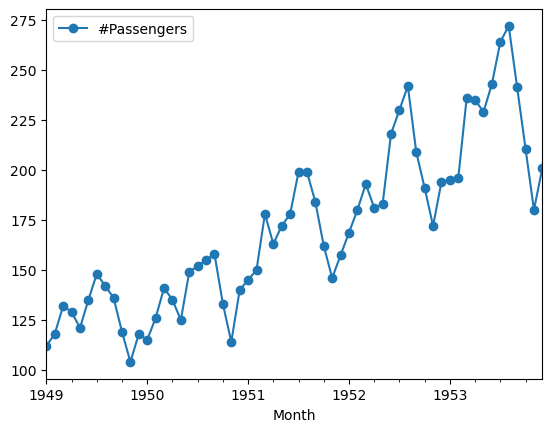

In [7]:
df = passengersvstime.interpolate(
    how = 'linear')
df.plot(marker = 'o')
plt.show()

For data that is not ordered and with enough data:

Simple statistical strategies possible:
- Fill with column mean.
- Fill with column median.
- Fill with column mode.

When to do which? Let's load in our trusty titanic dataset:

In [8]:
titanic_df = pd.read_csv('Data/titanic.csv')

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


TypeError: annotate() missing 1 required positional argument: 's'

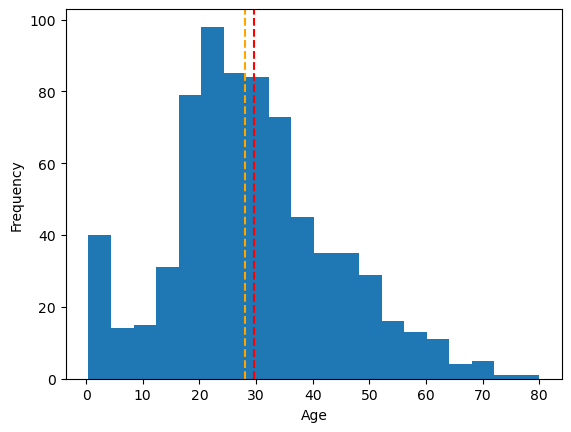

In [10]:
titanic_df['Age'].plot.hist(bins = 20)
plt.axvline(titanic_df['Age'].mean(), c = 'r', linestyle = "--")
plt.axvline(titanic_df['Age'].median(), c = 'orange', linestyle = "--")
plt.xlabel('Age')
plt.annotate(xy = (titanic_df['Age'].median()- 11, 50), c = 'orange', text = 'Median' )
plt.annotate(xy = (titanic_df['Age'].mean() + 2, 50), c = 'red', text = 'Mean' )
plt.title('Titanic: Distribution of Age')
plt.show()

Imputation with mean or median:
- Good strategy here
- Mean/median representative of range of values with highest probability.
- Approximation gets better: tighter the distribution about mean/median.

#### Impute with outliers. 
- Median can be a better option when faced with outliers.

Scenario:

- Historians find new manifest on Titanic with more passengers.
- Was bring your grandparents to the Titanic day.

In [11]:

age_new = pd.Series(np.append(titanic_df['Age'].values, np.random.normal(loc = 90, scale = 5, size = 120)))

TypeError: annotate() missing 1 required positional argument: 's'

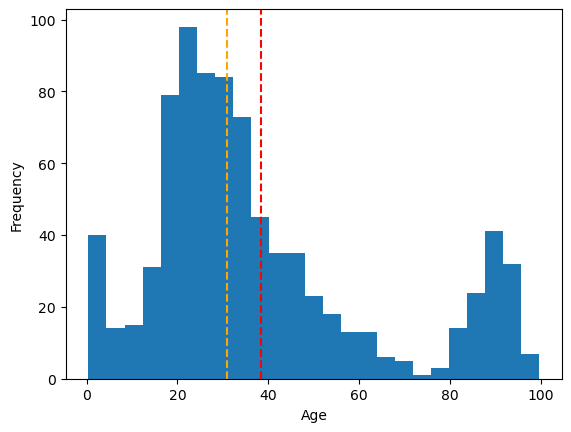

In [12]:
age_new.plot.hist(bins = 25)
plt.axvline(age_new.mean(), c = 'r', linestyle = "--")
plt.axvline(age_new.median(), c = 'orange', linestyle = "--")
plt.xlabel('Age')
plt.annotate(xy = (age_new.median()- 14, 50), c = 'orange', text = 'Median' )
plt.annotate(xy = (age_new.mean() + 2, 50), c = 'red', text = 'Mean' )
plt.title('Titanic: New Distribution of Age')
plt.show()

TypeError: annotate() missing 1 required positional argument: 's'

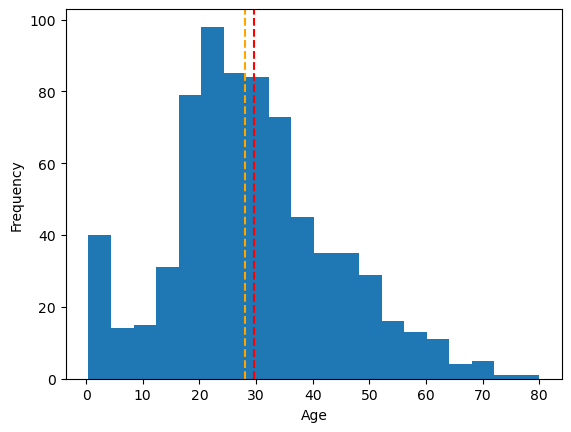

In [13]:
titanic_df['Age'].plot.hist(bins = 20)
plt.axvline(titanic_df['Age'].mean(), c = 'r', linestyle = "--")
plt.axvline(titanic_df['Age'].median(), c = 'orange', linestyle = "--")
plt.xlabel('Age')
plt.annotate(xy = (titanic_df['Age'].median()- 11, 50), c = 'orange', text = 'Median' )
plt.annotate(xy = (titanic_df['Age'].mean() + 2, 50), c = 'red', text = 'Mean' )
plt.title('Titanic: Distribution of Age')
plt.show()

Median much more stable than mean and near bulk of distribution. 

Better to impute with median in this case.

Suppose we have missing values in Fare.

- Based on distribution, impute with:
    - Median?
    - Mean?
    - Mode?

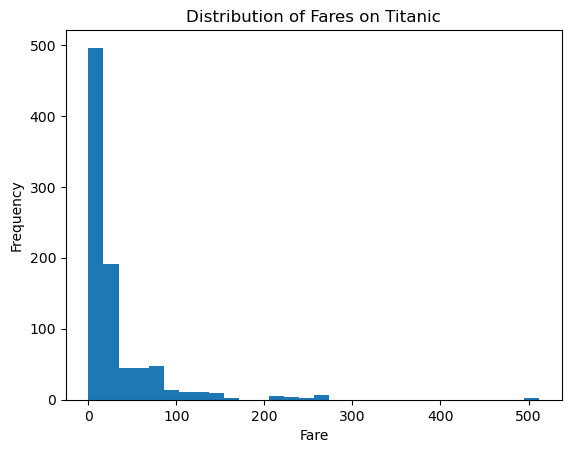

In [14]:
titanic_df['Fare'].plot.hist(bins = 30)
plt.xlabel('Fare')
plt.title('Distribution of Fares on Titanic')
plt.show()

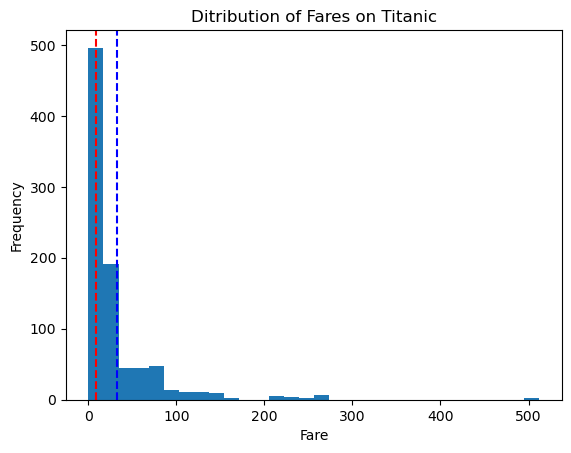

In [15]:
titanic_df['Fare'].plot.hist(bins = 30)
plt.axvline(titanic_df['Fare'].mode()[0], c = 'r', linestyle = "--")
plt.axvline(titanic_df['Fare'].mean(), c = 'b', linestyle = "--")

plt.xlabel('Fare')
plt.title('Ditribution of Fares on Titanic')
plt.show()

In [16]:
titanic_df['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

Mode can be a good imputation choice when data is highly skewed on a specific value.

#### Simple statistical imputation in pandas
- .fillna(value = ...)

In [19]:
age_median = titanic_df['Age'].median()
titanic_df['Age'].fillna(value = age_median, inplace = True)

Exact same logic for other types of statistical imputation.

In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### This is the bare tip of statistical imputation strategies.

- Many more sophisticated methods exist.
    - e.g., Multivariate Imputation by Chained Equation.
- Entire books written on the subject.


But just follow this:
- Look at your data.
- See what makes sense and is as easy as possible!
- Can always come back later.